# Simple CNN for MNIST 

Using the MNIST dataset (70 000 pictures of hand-written digits) we will train a simple CNN, which is able to predict a digit given a picture of a hand-written digit with 99% accuracy. 

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


Network parameters:

In [18]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

Prepare data into training and test set.

In [3]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
input_shape = (1, img_rows, img_cols)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [14]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


Build the CNN. 

In [21]:
model2 = Sequential()

model2.add(Conv2D(nb_filters, kernel_size=kernel_size,
                        padding='valid',
                        input_shape=(28,28,1)))
model2.add(Activation('relu'))
model2.add(Conv2D(nb_filters, kernel_size))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=pool_size))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

Show a summary of the model parameters. 

In [22]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
__________

And now train the model and evaluate on the test set. 

In [23]:
history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 194us/step - loss: 0.3118 - acc: 0.9041 - val_loss: 0.0779 - val_acc: 0.9750
Epoch 2/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.1094 - acc: 0.9673 - val_loss: 0.0434 - val_acc: 0.9857
Epoch 3/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0800 - acc: 0.9767 - val_loss: 0.0411 - val_acc: 0.9863
Epoch 4/12
60000/60000 [==============================] - 4s 62us/step - loss: 0.0661 - acc: 0.9803 - val_loss: 0.0353 - val_acc: 0.9878
Epoch 5/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.0584 - acc: 0.9822 - val_loss: 0.0312 - val_acc: 0.9890
Epoch 6/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.0508 - acc: 0.9848 - val_loss: 0.0282 - val_acc: 0.9899
Epoch 7/12
60000/60000 [==============================] - 4s 66us/step - loss: 0.0450 - acc: 0.9864 - val_loss: 0.0322 - val_a

In [25]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.028416055691792418
Test accuracy: 0.9903


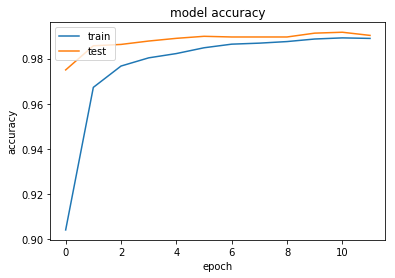

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()